# Scatter Plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Run the line below to download the dataset

In [2]:
!curl https://wagon-public-datasets.s3.amazonaws.com/02-Data-Toolkit/03-Data-Visualization/4_ThreeNum.csv > 4_ThreeNum.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6806  100  6806    0     0  28523      0 --:--:-- --:--:-- --:--:-- 28596


In [66]:
gdp_df = pd.read_csv('4_ThreeNum.csv')
gdp_df

,country,continent,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,43.828,31889923,974.580338
1,Albania,Europe,76.423,3600523,5937.029526
2,Algeria,Africa,72.301,33333216,6223.367465
3,Angola,Africa,42.731,12420476,4797.231267
4,Argentina,Americas,75.320,40301927,12779.379640
...,...,...,...,...,...
137,Vietnam,Asia,74.249,85262356,2441.576404
138,West Bank and Gaza,Asia,73.422,4018332,3025.349798
139,"Yemen, Rep.",Asia,62.698,22211743,2280.769906
140,Zambia,Africa,42.384,11746035,1271.211593


In [4]:
gdp_df.describe()

,lifeExp,pop,gdpPercap
count,142.000000,1.420000e+02,142.000000
mean,67.007423,4.402122e+07,11680.071820
std,12.073021,1.476214e+08,12859.937337
min,39.613000,1.995790e+05,277.551859
25%,57.160250,4.508034e+06,1624.842248
50%,71.935500,1.051753e+07,6124.371108
75%,76.413250,3.121004e+07,18008.835640
max,82.603000,1.318683e+09,49357.190170


## Part 1

Text(0.1, -0.11, 'Population (M)')

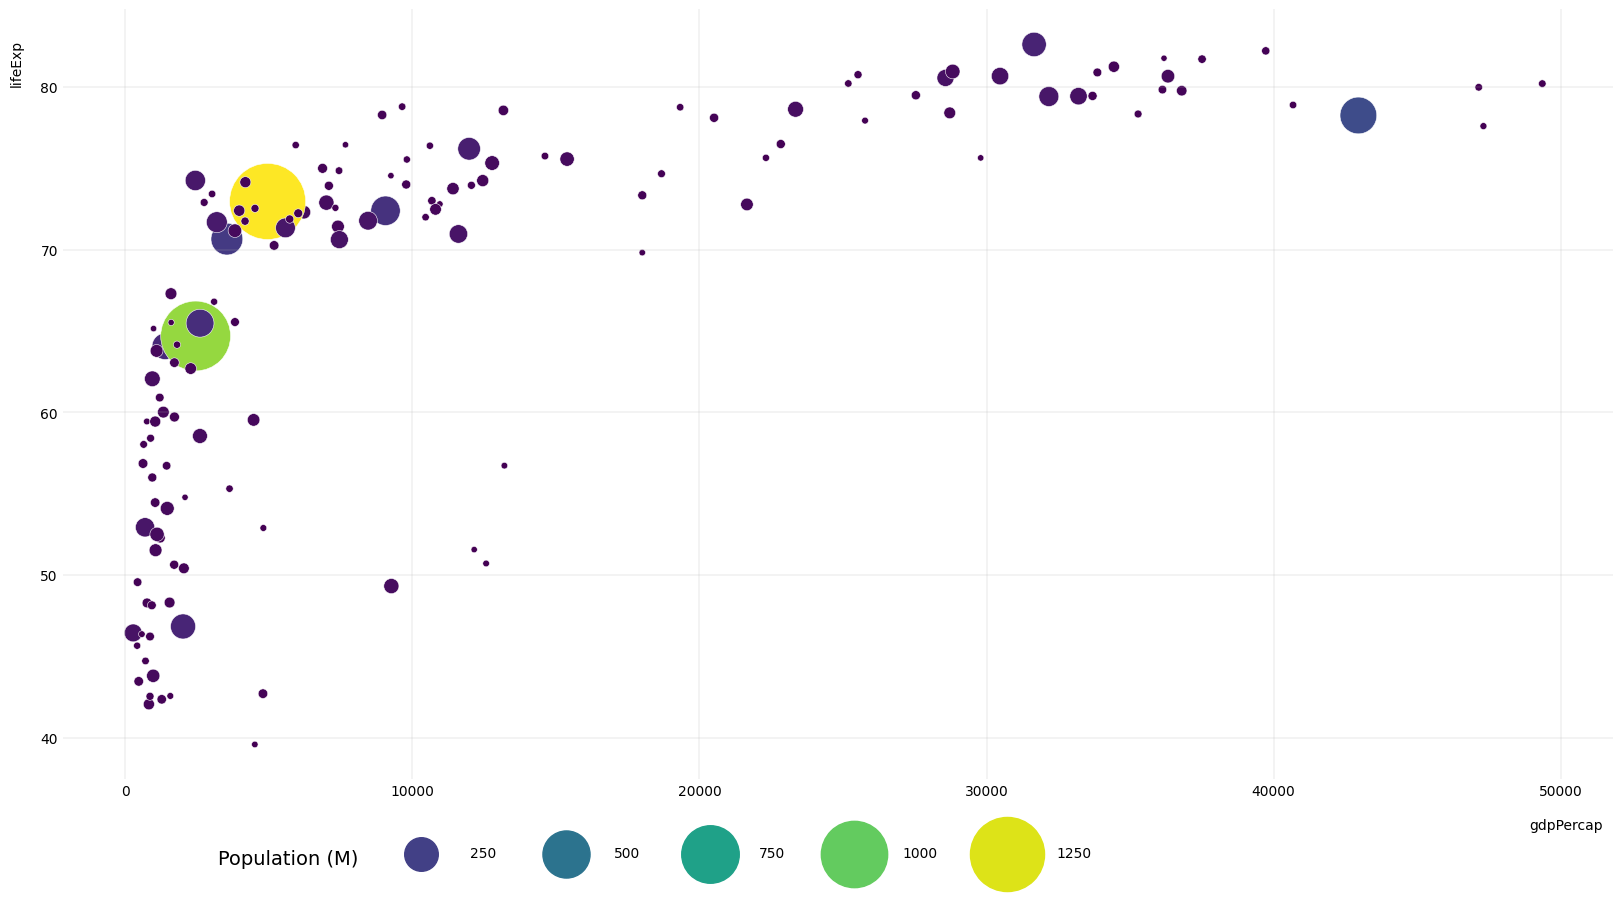

In [87]:
plt.figure(figsize=(20,10))
plt.grid(axis="both", linewidth=0.2)
ax=sns.scatterplot(data=gdp_df, x='gdpPercap', y='lifeExp', hue='pop', size='pop',label='Population',
               palette=sns.color_palette("viridis", as_cmap=True), sizes=(20,3000))
plt.legend()
sns.despine(top=True, bottom=True, left=True, right=True)
ax.xaxis.set_label_coords(0.97, -0.05)
ax.yaxis.set_label_coords(-0.025, 0.93)
ax.tick_params(axis=u'both', which=u'both',length=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[-5:], ('250','500','750','1000','1250'), bbox_to_anchor=(0.2, -.15, 1., .102), loc='lower left',
           ncol=5, borderpad=2, frameon=False, handletextpad=2.5, columnspacing=4)
ax.annotate("Population (M)", xy=(0.1, -0.11), xycoords='axes fraction', fontsize=14)


## Part 2

In [88]:
handles, labels = ax.get_legend_handles_labels()

labels

['Population', '0.25', '0.50', '0.75', '1.00', '1.25']

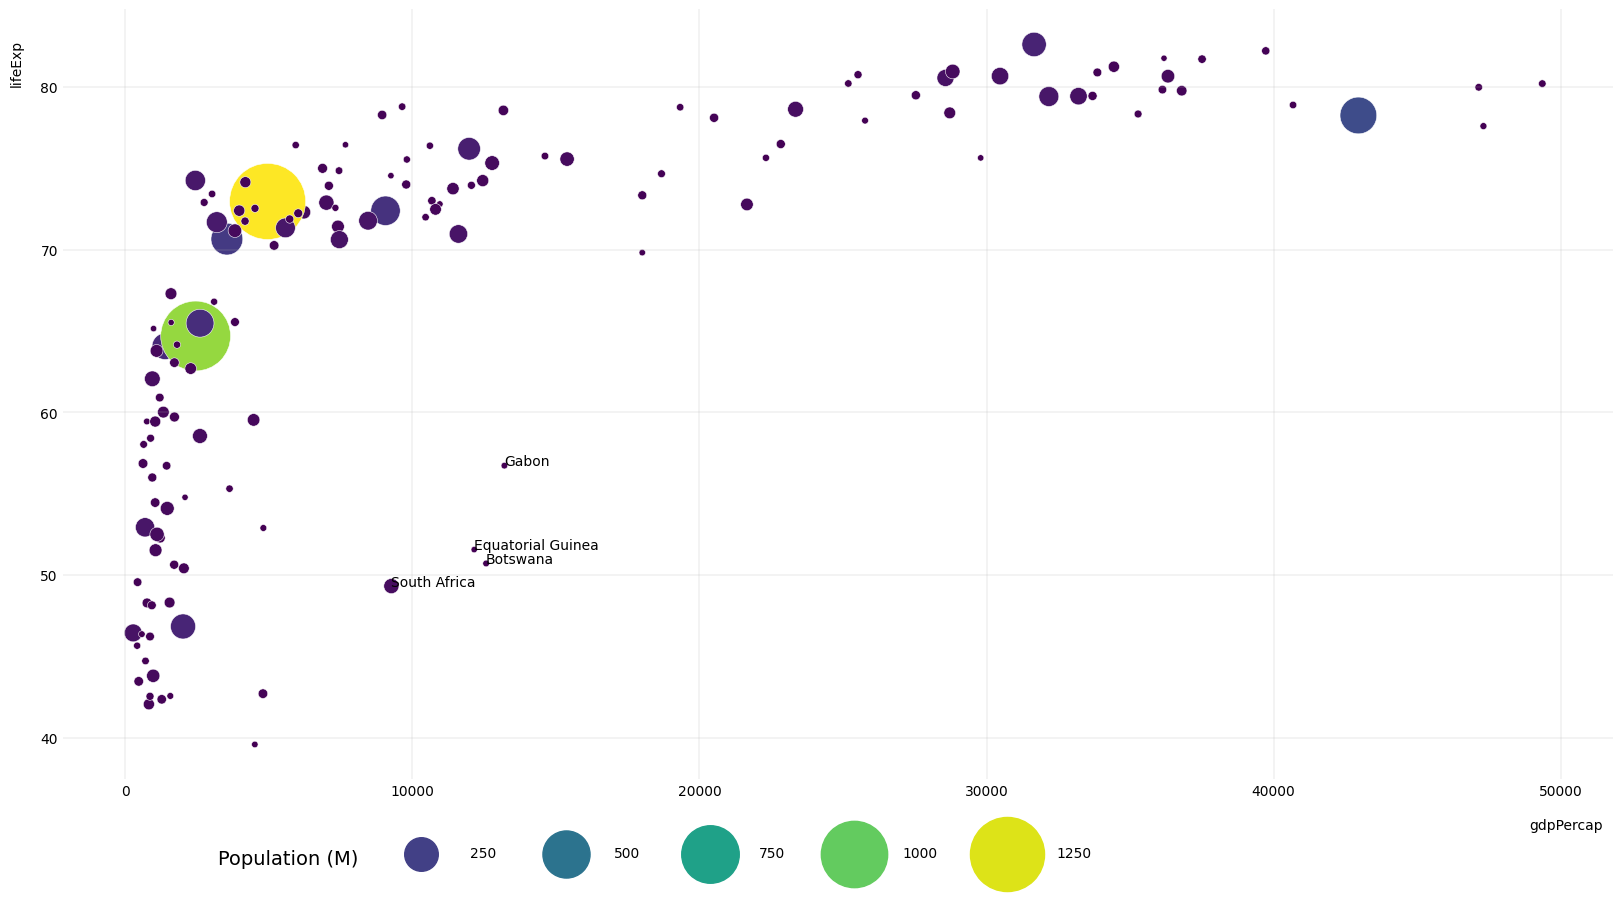

In [108]:
plt.figure(figsize=(20,10))
plt.grid(axis="both", linewidth=0.2)
ax=sns.scatterplot(data=gdp_df, x='gdpPercap', y='lifeExp', hue='pop', size='pop',label='Population',
               palette=sns.color_palette("viridis", as_cmap=True), sizes=(20,3000))
plt.legend()
sns.despine(top=True, bottom=True, left=True, right=True)
ax.xaxis.set_label_coords(0.97, -0.05)
ax.yaxis.set_label_coords(-0.025, 0.93)
ax.tick_params(axis=u'both', which=u'both',length=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[-5:], ('250','500','750','1000','1250'), bbox_to_anchor=(0.2, -.15, 1., .102), loc='lower left',
           ncol=5, borderpad=2, frameon=False, handletextpad=2.5, columnspacing=4)
ax.annotate("Population (M)", xy=(0.1, -0.11), xycoords='axes fraction', fontsize=14)

for idx, row in gdp_df.iterrows():
    if row["gdpPercap"] > 5000 and row["lifeExp"] < 65:
        ax.text(row["gdpPercap"], row["lifeExp"], row["country"])

## 3. Interactive plot with plotly

In [91]:
import plotly.express as px

In [97]:
fig = px.scatter(
    gdp_df,
    x="gdpPercap",
    y="lifeExp",
    size="pop",
    color="continent",
    hover_name="country",
    size_max=60,
)
fig.show()